# Convolutional Autoencoder in Pokemon

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import pickle as pkl
import gzip
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# read pklz of Pokemons
f = gzip.open('pokemonsData.pklz','rb')
dict_pokemons = pkl.load(f)
f.close()

X = []
y = []

for pokemon_number in sorted(dict_pokemons):
    X.append(dict_pokemons[pokemon_number]["image"])
    y.append(dict_pokemons[pokemon_number]["name"].decode())
    
X = np.array(X)    

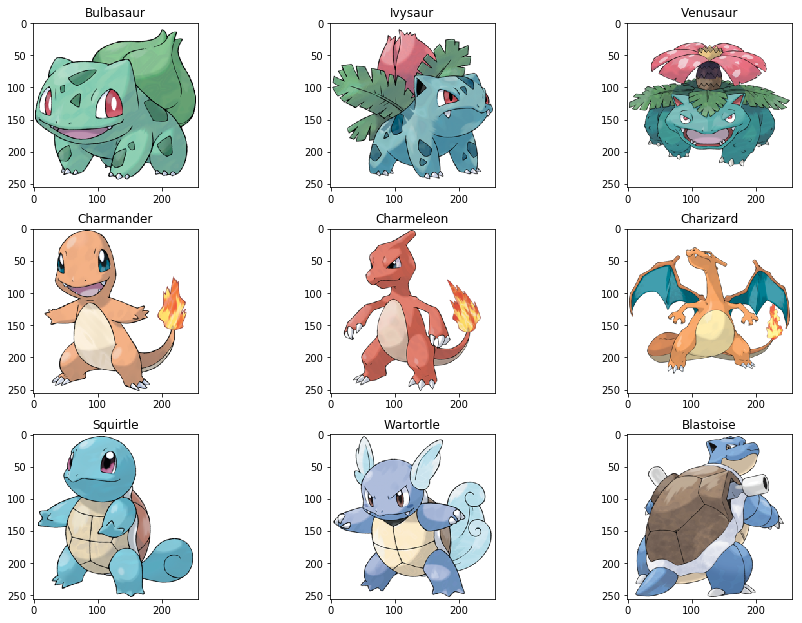

In [3]:
# Plot initials and evolutions
f, axarr = plt.subplots(3, 3)
plt.subplots_adjust(left=0.0, bottom=0, right=2.0, top=2.0,wspace=0.1, hspace=0.25)
axarr[0, 0].imshow(X[0])
axarr[0, 0].set_title(y[0])
axarr[0, 1].imshow(X[1])
axarr[0, 1].set_title(y[1])
axarr[0, 2].imshow(X[2])
axarr[0, 2].set_title(y[2])

axarr[1, 0].imshow(X[3])
axarr[1, 0].set_title(y[3])
axarr[1, 1].imshow(X[4])
axarr[1, 1].set_title(y[4])
axarr[1, 2].imshow(X[5])
axarr[1, 2].set_title(y[5])

axarr[2, 0].imshow(X[6])
axarr[2, 0].set_title(y[6])
axarr[2, 1].imshow(X[7])
axarr[2, 1].set_title(y[7])
axarr[2, 2].imshow(X[8])
axarr[2, 2].set_title(y[8])


In [4]:
print(type(X[0]), X[0].shape)

<class 'numpy.ndarray'> (256, 256, 4)


In [5]:
def swish(x):
    return x*tf.nn.sigmoid(x)

In [6]:
# Input and Targets
# In AutoEncoder, the input is the same of the targers
def model_inputs(real_dim, deco_dim):
    
    inputs = tf.placeholder(tf.float32, (None, *real_dim), name='inputs')
    targets = tf.placeholder(tf.float32, (None, *real_dim), name='targets')
    decoder_input = tf.placeholder(tf.float32, (None, *deco_dim), name='decoder_input')
    
    return inputs, targets, decoder_input

In [7]:
def encoder(inputs, reuse=False, kernel_shape = (5,5)):

    with tf.variable_scope('encoder', reuse=reuse):
        # inputs 256x256x4
        
        ### Encoder
        conv1 = tf.layers.conv2d(inputs, 16, kernel_shape, padding='same', activation=swish)
        # Now 256x256x16
        maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')

        # Now 128x128x16
        conv2 = tf.layers.conv2d(maxpool1, 32, kernel_shape, padding='same', activation=swish)
        # Now 128x128x32
        maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')

        # Now 64x64x32
        conv3 = tf.layers.conv2d(maxpool2, 64, kernel_shape, padding='same', activation=swish)
        # Now 64x64x64
        maxpool3 = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')

        # Now 32x32x64
        conv4 = tf.layers.conv2d(maxpool3, 128, kernel_shape, padding='same', activation=tf.nn.tanh)
        # Now 32x32x128
        encoded = tf.layers.max_pooling2d(conv4, (2,2), (2,2), padding='same', name='encoded')
        # Now 16x16x128

        return encoded

In [8]:
def decoder(encoded, reuse=False, kernel_shape = (5,5)):

    with tf.variable_scope('decoder', reuse=reuse):
        ### Decoder
        upsample1 = tf.image.resize_nearest_neighbor(encoded, (32,32))
        # Now 32x32x128
        conv5 = tf.layers.conv2d(upsample1, 64, kernel_shape, padding='same', activation=swish)
        # Now 32x32x64

        upsample2 = tf.image.resize_nearest_neighbor(conv5, (64,64))
        # Now 64x64x64
        conv6 = tf.layers.conv2d(upsample2, 32, kernel_shape, padding='same', activation=swish)
        # Now 64x64x32

        upsample3 = tf.image.resize_nearest_neighbor(conv6, (128,128))
        # Now 128x128x32
        conv7 = tf.layers.conv2d(upsample3, 16, kernel_shape, padding='same', activation=swish)
        # Now 128x128x16

        upsample4 = tf.image.resize_nearest_neighbor(conv7, (256,256))
        # Now 256x256x16
        logits = tf.layers.conv2d(upsample4, 4, kernel_shape, padding='same', activation=None)
        # Now 256x256x4

        decoded = tf.nn.sigmoid(logits, name='decoded')

        return decoded, logits

In [9]:
def model_loss_opt(targets, logits, lr):

    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits)
    cost = tf.reduce_mean(loss)
    opt = tf.train.AdamOptimizer(lr).minimize(cost)
    
    return loss, cost, opt

In [10]:
real_dim = (256, 256, 4)
deco_dim = (16, 16, 128)
k_shape = (6, 6)
lr = 0.001

tf.reset_default_graph()
inputs, targets, decoder_input = model_inputs(real_dim, deco_dim)
encoded = encoder(inputs, kernel_shape=k_shape)
decoded, logits = decoder(encoded, kernel_shape=k_shape)
loss, cost, opt = model_loss_opt(targets, logits, lr)

## Training

In [11]:
def pokemon_batches(X, batch_size):
    for ii in range(0, len(X), batch_size):
        x = X[ii:ii+batch_size]    
        yield x

Epoch: 1/100... Training loss: 0.2891


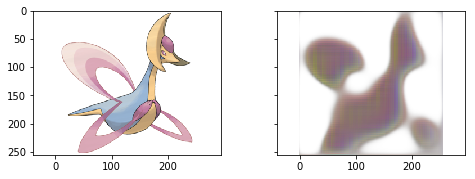

Epoch: 2/100... Training loss: 0.2472


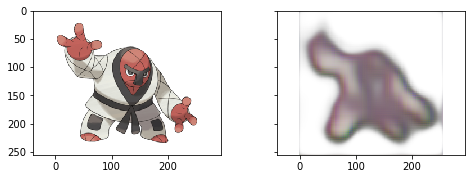

Epoch: 3/100... Training loss: 0.2306


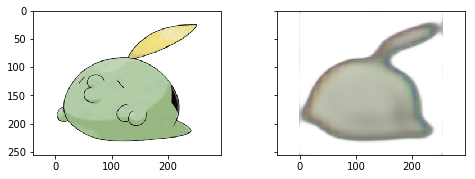

Epoch: 4/100... Training loss: 0.2195


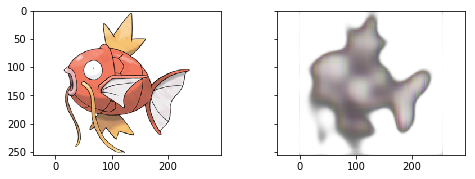

Epoch: 5/100... Training loss: 0.2097


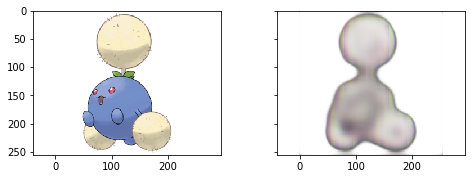

Epoch: 6/100... Training loss: 0.2032


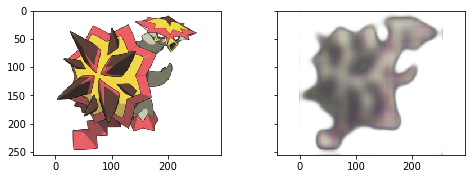

Epoch: 7/100... Training loss: 0.2014


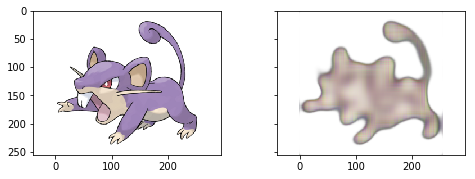

Epoch: 8/100... Training loss: 0.1978


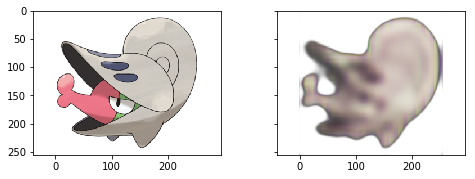

Epoch: 9/100... Training loss: 0.1947


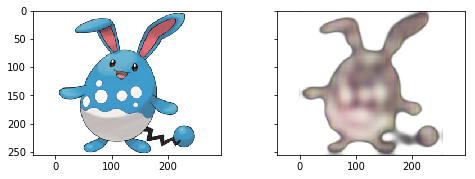

Epoch: 10/100... Training loss: 0.1924


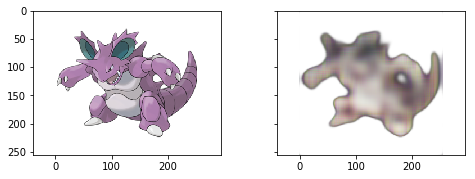

Epoch: 11/100... Training loss: 0.1929


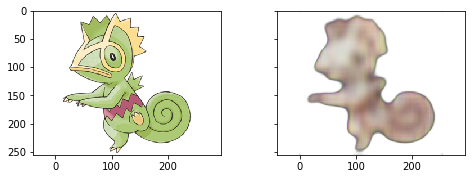

Epoch: 12/100... Training loss: 0.1888


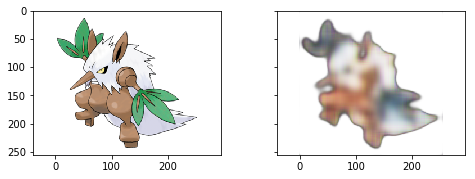

Epoch: 13/100... Training loss: 0.1903


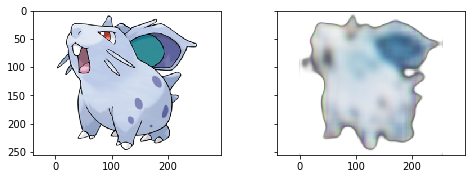

Epoch: 14/100... Training loss: 0.1868


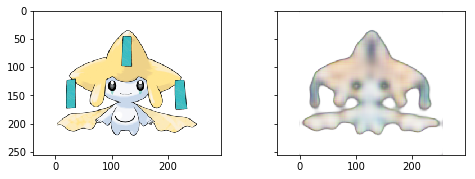

Epoch: 15/100... Training loss: 0.1840


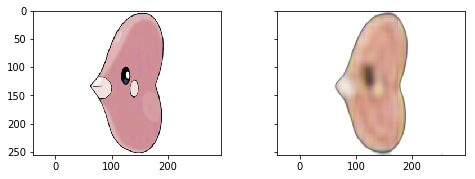

Epoch: 16/100... Training loss: 0.1827


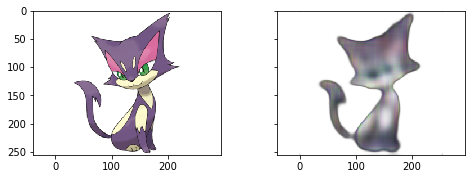

Epoch: 17/100... Training loss: 0.1811


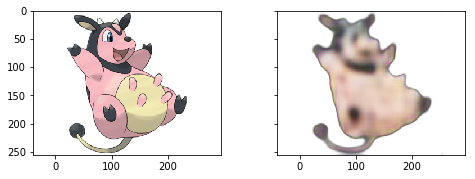

Epoch: 18/100... Training loss: 0.1797


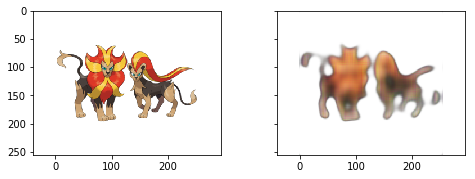

Epoch: 19/100... Training loss: 0.1789


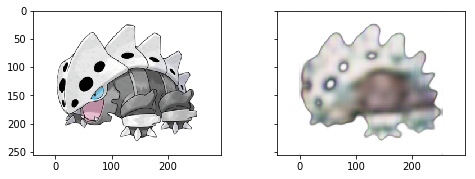

Epoch: 20/100... Training loss: 0.1781


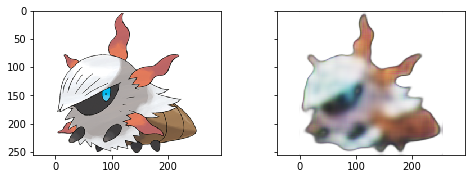

Epoch: 21/100... Training loss: 0.1819


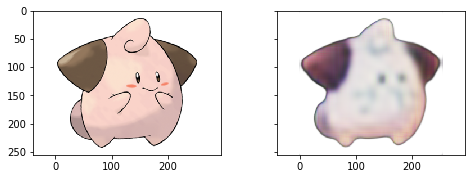

Epoch: 22/100... Training loss: 0.1778


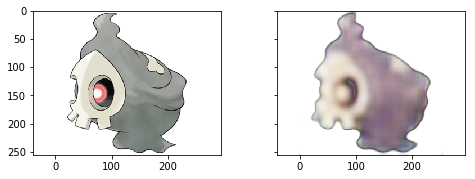

Epoch: 23/100... Training loss: 0.1757


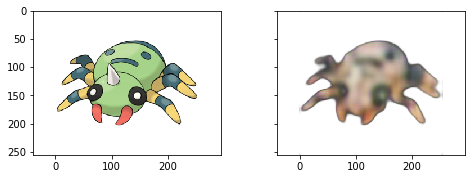

Epoch: 24/100... Training loss: 0.1749


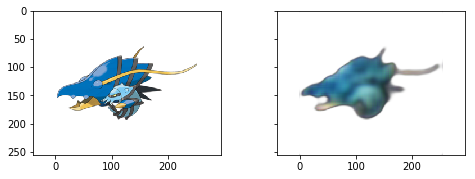

Epoch: 25/100... Training loss: 0.1733


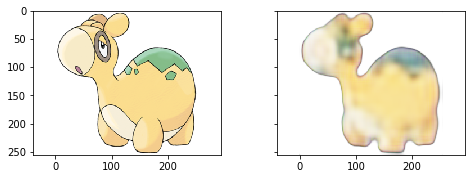

Epoch: 26/100... Training loss: 0.1726


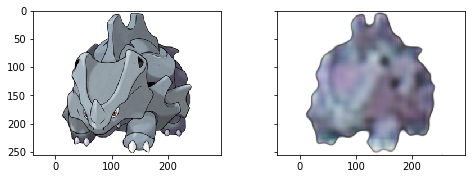

Epoch: 27/100... Training loss: 0.1727


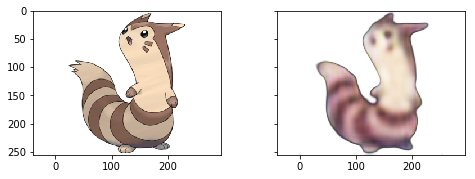

Epoch: 28/100... Training loss: 0.1725


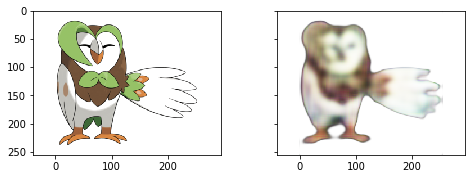

Epoch: 29/100... Training loss: 0.1716


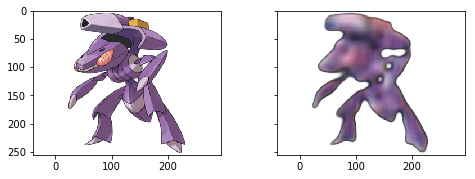

Epoch: 30/100... Training loss: 0.1719


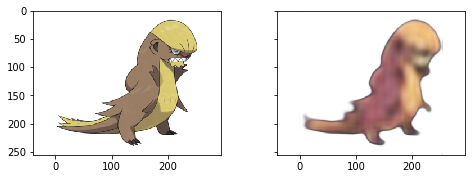

Epoch: 31/100... Training loss: 0.1702


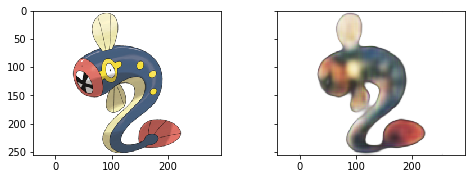

Epoch: 32/100... Training loss: 0.1695


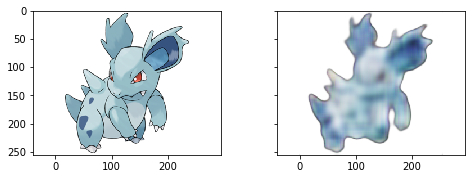

Epoch: 33/100... Training loss: 0.1691


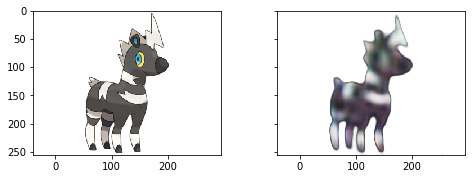

Epoch: 34/100... Training loss: 0.1685


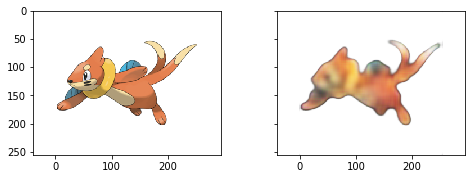

Epoch: 35/100... Training loss: 0.1676


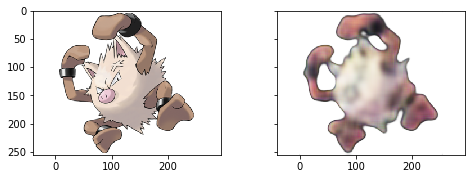

Epoch: 36/100... Training loss: 0.1678


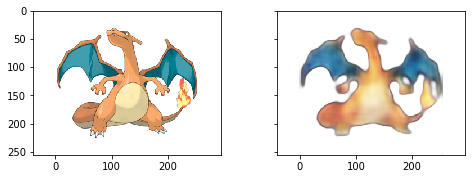

Epoch: 37/100... Training loss: 0.1672


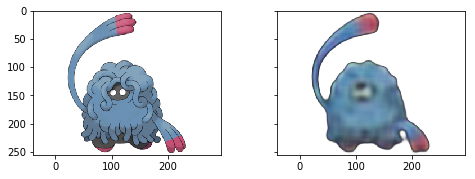

Epoch: 38/100... Training loss: 0.1665


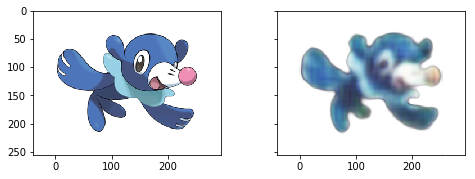

Epoch: 39/100... Training loss: 0.1666


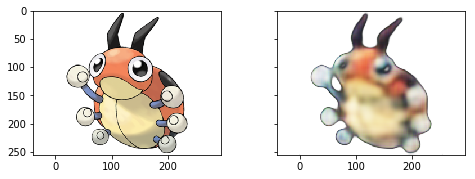

Epoch: 40/100... Training loss: 0.1668


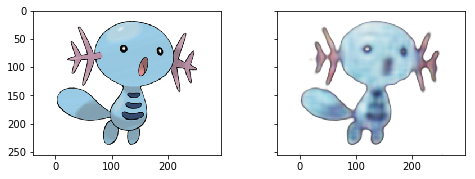

Epoch: 41/100... Training loss: 0.1665


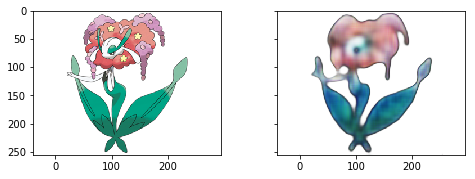

Epoch: 42/100... Training loss: 0.1654


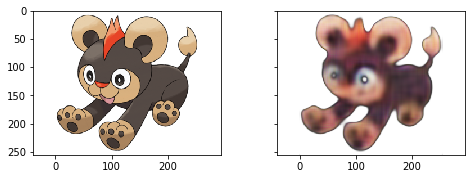

Epoch: 43/100... Training loss: 0.1651


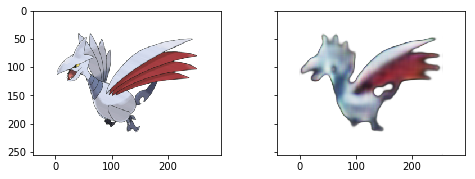

Epoch: 44/100... Training loss: 0.1658


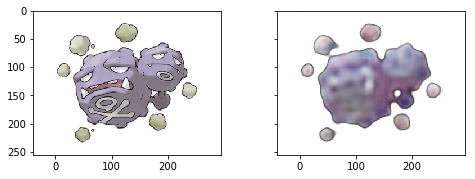

Epoch: 45/100... Training loss: 0.1655


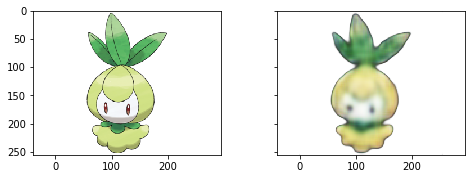

Epoch: 46/100... Training loss: 0.1646


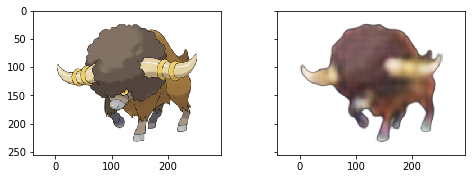

Epoch: 47/100... Training loss: 0.1639


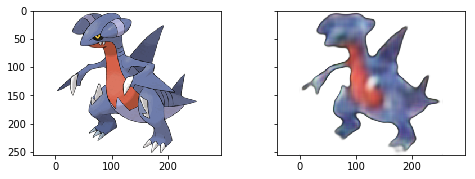

Epoch: 48/100... Training loss: 0.1637


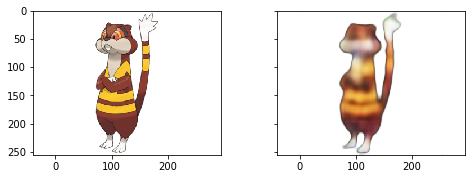

Epoch: 49/100... Training loss: 0.1641


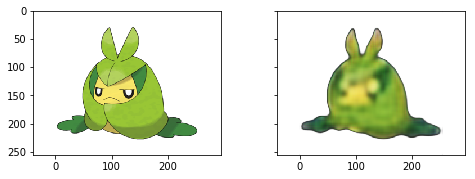

Epoch: 50/100... Training loss: 0.1637


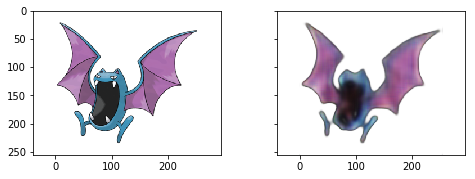

Epoch: 51/100... Training loss: 0.1629


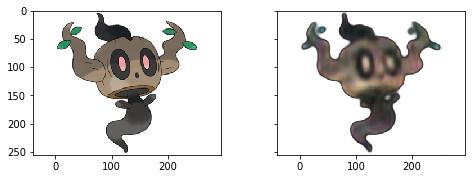

Epoch: 52/100... Training loss: 0.1623


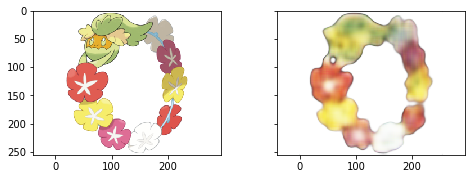

Epoch: 53/100... Training loss: 0.1618


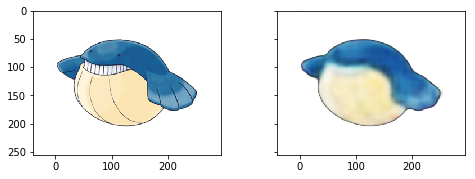

Epoch: 54/100... Training loss: 0.1621


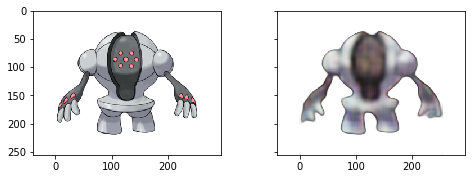

Epoch: 55/100... Training loss: 0.1627


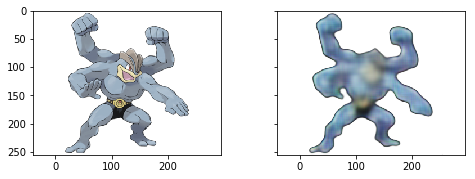

Epoch: 56/100... Training loss: 0.1637


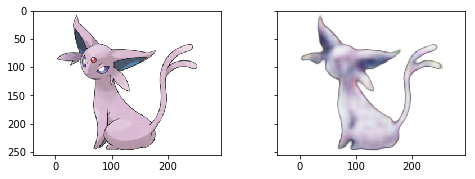

Epoch: 57/100... Training loss: 0.1613


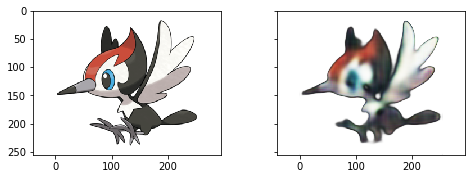

Epoch: 58/100... Training loss: 0.1605


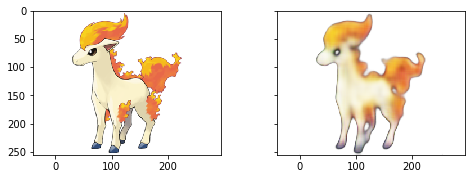

Epoch: 59/100... Training loss: 0.1604


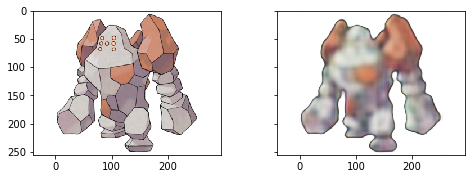

Epoch: 60/100... Training loss: 0.1607


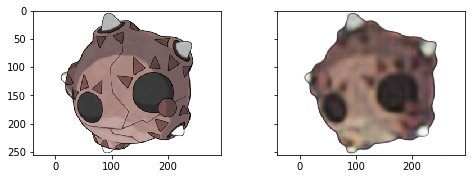

Epoch: 61/100... Training loss: 0.1625


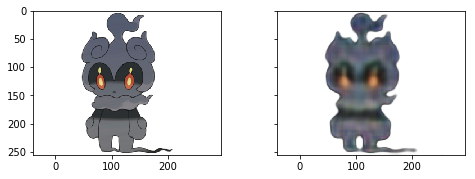

Epoch: 62/100... Training loss: 0.1604


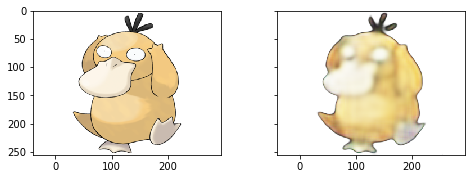

Epoch: 63/100... Training loss: 0.1600


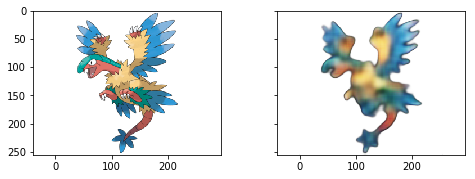

Epoch: 64/100... Training loss: 0.1613


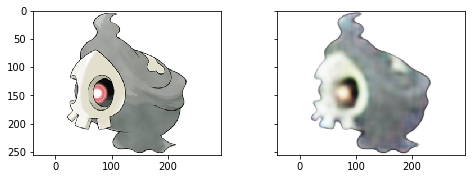

Epoch: 65/100... Training loss: 0.1611


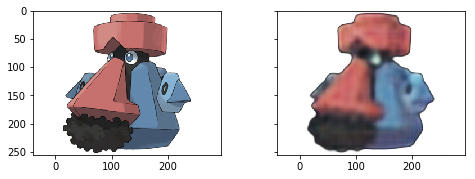

Epoch: 66/100... Training loss: 0.1599


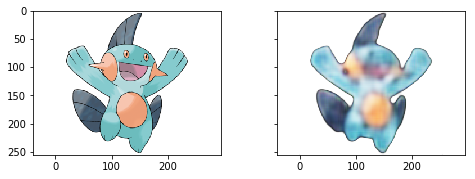

Epoch: 67/100... Training loss: 0.1632


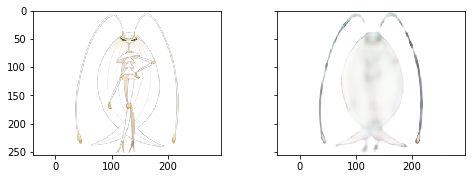

Epoch: 68/100... Training loss: 0.1651


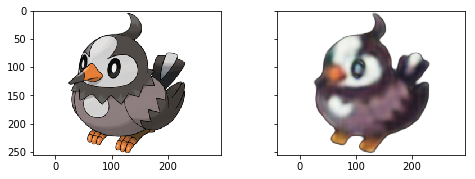

Epoch: 69/100... Training loss: 0.1632


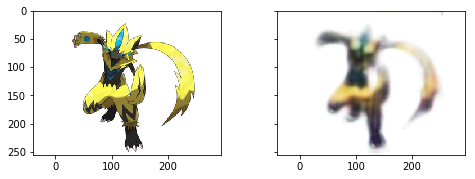

Epoch: 70/100... Training loss: 0.1614


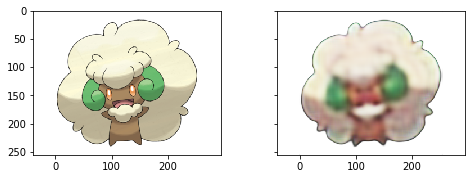

Epoch: 71/100... Training loss: 0.1602


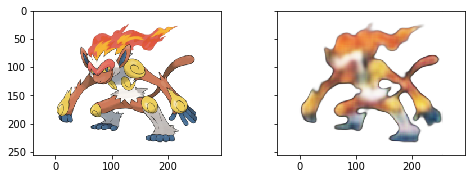

Epoch: 72/100... Training loss: 0.1596


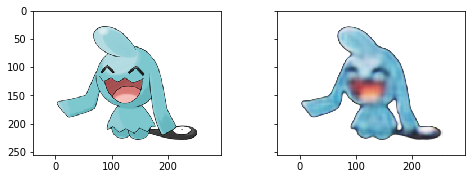

Epoch: 73/100... Training loss: 0.1584


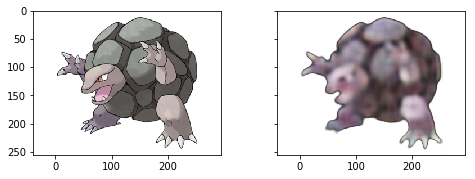

Epoch: 74/100... Training loss: 0.1582


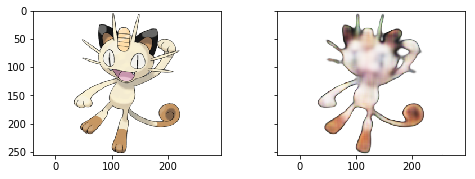

Epoch: 75/100... Training loss: 0.1582


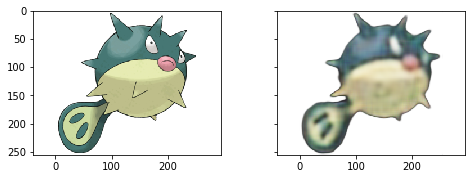

Epoch: 76/100... Training loss: 0.1591


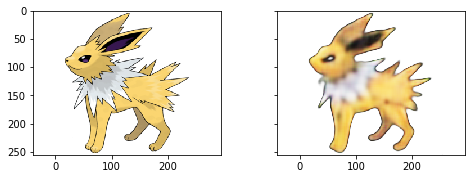

Epoch: 77/100... Training loss: 0.1582


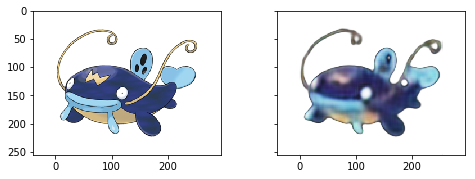

Epoch: 78/100... Training loss: 0.1580


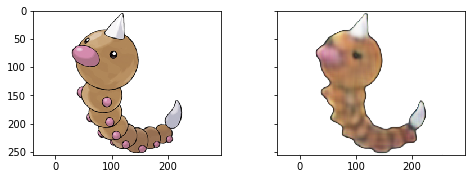

Epoch: 79/100... Training loss: 0.1572


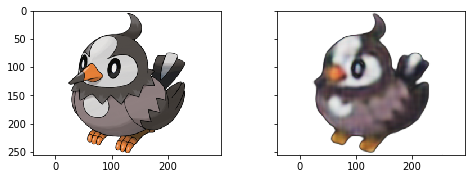

Epoch: 80/100... Training loss: 0.1574


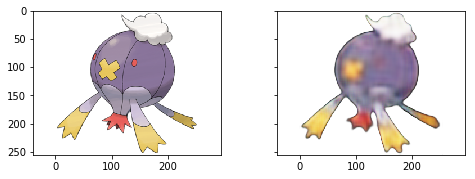

Epoch: 81/100... Training loss: 0.1566


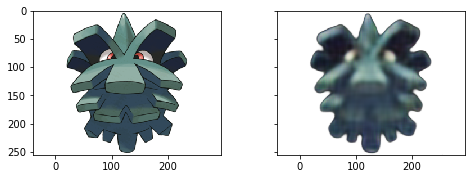

Epoch: 82/100... Training loss: 0.1569


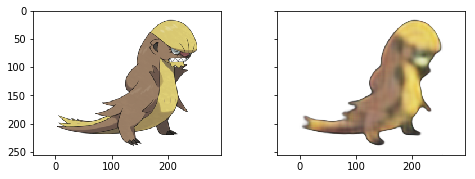

Epoch: 83/100... Training loss: 0.1562


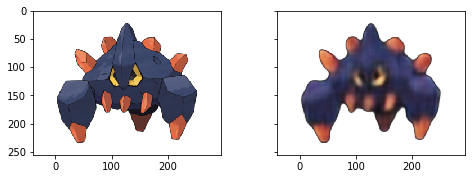

Epoch: 84/100... Training loss: 0.1569


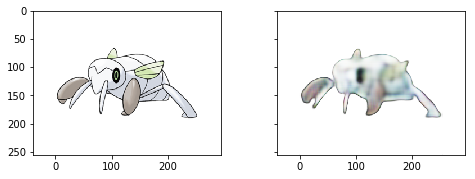

Epoch: 85/100... Training loss: 0.1563


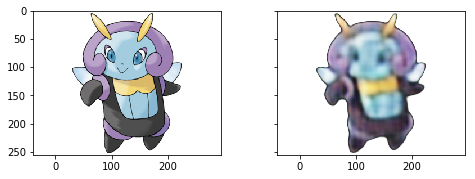

Epoch: 86/100... Training loss: 0.1573


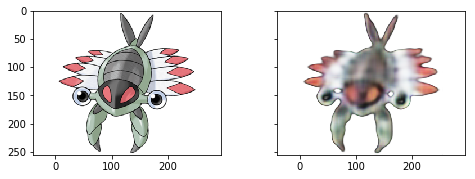

Epoch: 87/100... Training loss: 0.1572


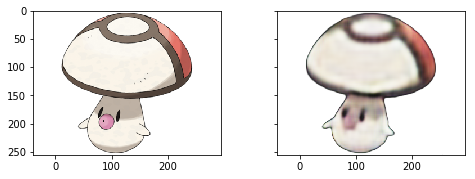

Epoch: 88/100... Training loss: 0.1583


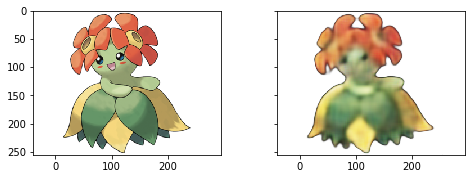

Epoch: 89/100... Training loss: 0.1598


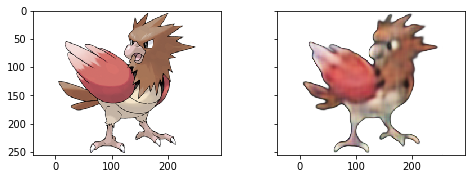

Epoch: 90/100... Training loss: 0.1563


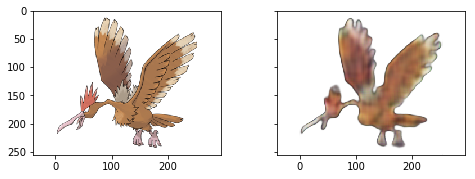

Epoch: 91/100... Training loss: 0.1554


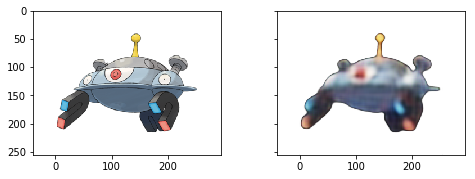

Epoch: 92/100... Training loss: 0.1557


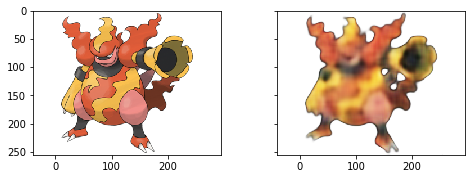

Epoch: 93/100... Training loss: 0.1573


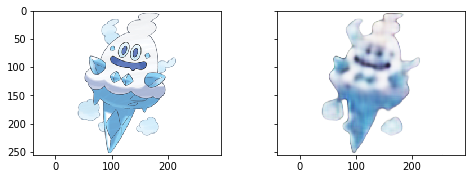

Epoch: 94/100... Training loss: 0.1564


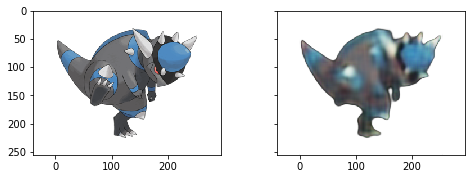

Epoch: 95/100... Training loss: 0.1574


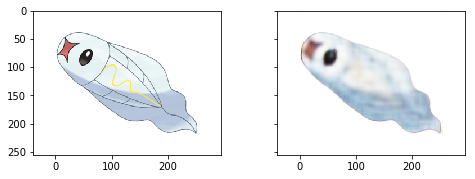

Epoch: 96/100... Training loss: 0.1553


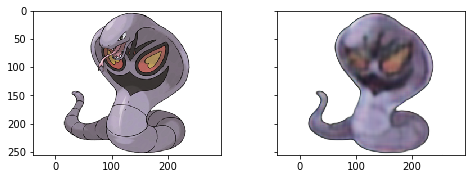

Epoch: 97/100... Training loss: 0.1548


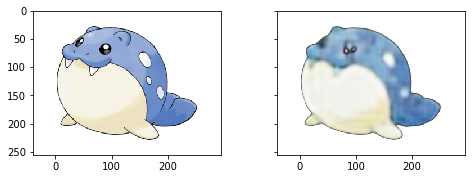

Epoch: 98/100... Training loss: 0.1552


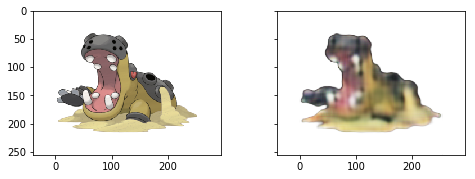

Epoch: 99/100... Training loss: 0.1563


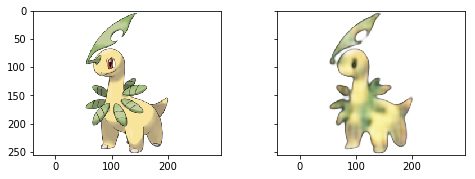

Epoch: 100/100... Training loss: 0.1569


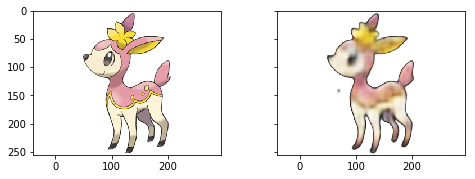

In [12]:
epochs = 100
batch_size = 50

check_every = 17
save_every_n = 17

saver = tf.train.Saver(max_to_keep=5)

steps = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for x in pokemon_batches(X, batch_size):

            steps += 1
            batch_cost, _ = sess.run([cost, opt], feed_dict={inputs: x, targets: x})

            if steps % check_every  == 0:

                print("Epoch: {}/{}...".format(e+1, epochs), "Training loss: {:.4f}".format(batch_cost))
                
                idx_pokemon = np.random.randint(0, len(X))
                
                reconstructed = sess.run(decoded, 
                                         feed_dict={inputs: X[idx_pokemon].reshape((1, *real_dim))})[0]
                
                f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
                plt.subplots_adjust(left=0.0, bottom=0, right=1.0, top=0.5,wspace=0.3, hspace=0.3)
                ax1.imshow(X[idx_pokemon])
                ax2.imshow(reconstructed)
                plt.show()
                
            if steps % save_every_n == 0:
                saver.save(sess, "checkpoints/i{}.ckpt".format(steps))                
                
    saver.save(sess, "checkpoints/i{}.ckpt".format(steps))  